In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

2023-08-28 13:54:26.553578: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-08-28 13:54:26.599313: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-28 13:54:26.834378: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-28 13:54:26.836106: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-28 13:54:28.215889: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [2]:
from DataLoader import DataLoader

In [3]:
videos_folder = "../../VCDB/dataset"
data_loader = DataLoader(videos_folder)

In [548]:
model = tf.keras.models.load_model("../../Results/Resnet_Trainable_custom_cross_attn_correct_00/Resnet_Trainable_custom_cross_attn_correct_00")

In [549]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, None, 224, 224, 3)   0         []                            
                             ]                                                                    
                                                                                                  
 input_3 (InputLayer)        [(None, None, 224, 224, 3)   0         []                            
                             ]                                                                    
                                                                                                  
 cnn_video_encoder (CNNVide  (None, None, 2048)           2358771   ['input_2[0][0]',             
 oEncoder)                                                2          'input_3[0][0]']       

In [67]:
video_0 = "../../VCDB/dataset/core_dataset/president_obama_takes_oath/e29e65d0e362b8e7d450d833227ea3c0f5f65f12.flv"
video_1 = "../../VCDB/dataset/core_dataset/president_obama_takes_oath/55dde762dc283ee301065f670b6d7c08c3c32668.flv"

In [550]:
video_0 = "../../VCDB/dataset/core_dataset/david_beckham_lights_the_olympic_torch/874a7d3cbfc17a46040b2d657667520bde309ca4.flv"
video_1 = "../../VCDB/dataset/core_dataset/david_beckham_lights_the_olympic_torch/c80dd6dfe271e4887c11bd76248411a8e7c853b0.flv"

In [551]:
video_0_frames = data_loader.read_video_frames(video_0, 1, "RESNET_50", 240)
video_1_frames = data_loader.read_video_frames(video_1, 1, "RESNET_50", 240)

In [552]:
video_0_frames = tf.expand_dims(video_0_frames, axis=0)
video_1_frames = tf.expand_dims(video_1_frames, axis=0)

In [553]:
video_0_frames.shape, video_1_frames.shape

(TensorShape([1, 43, 224, 224, 3]), TensorShape([1, 64, 224, 224, 3]))

In [554]:
t0 = tf.RaggedTensor.from_tensor(video_0_frames)
t1 = tf.RaggedTensor.from_tensor(video_1_frames)

In [555]:
video_0_enc, video_0_attn, video_1_enc, video_1_attn = model([t0, t1])

In [556]:
video_0_attn.shape

TensorShape([1, 43, 64])

In [557]:
tf.matmul(video_0_enc, tf.transpose(video_1_enc))

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.8589663]], dtype=float32)>

In [558]:
video_0_attn.shape

TensorShape([1, 43, 64])

In [592]:
video_1_attn.shape

TensorShape([1, 64, 43])

In [559]:
video_0_attn_sum = tf.math.reduce_sum(video_0_attn[0], axis=-1)

In [560]:
video_0_attn_sum

<tf.Tensor: shape=(43,), dtype=float32, numpy=
array([27.953335, 30.15699 , 30.826408, 31.252048, 30.773537, 38.15599 ,
       38.582413, 37.158413, 37.631435, 36.11345 , 37.201332, 39.128143,
       43.367134, 42.156513, 42.96283 , 40.966457, 41.471798, 41.844036,
       41.109932, 41.49824 , 41.90413 , 29.635878, 29.468277, 29.322123,
       27.337189, 28.20066 , 30.330528, 28.499   , 28.98692 , 29.94825 ,
       47.343655, 45.942303, 46.20929 , 37.69217 , 43.358604, 44.730972,
       43.017555, 44.953484, 44.74665 , 45.277943, 46.583042, 48.326897,
       46.85683 ], dtype=float32)>

Text(0, 0.5, 'Sum of Attention Scores')

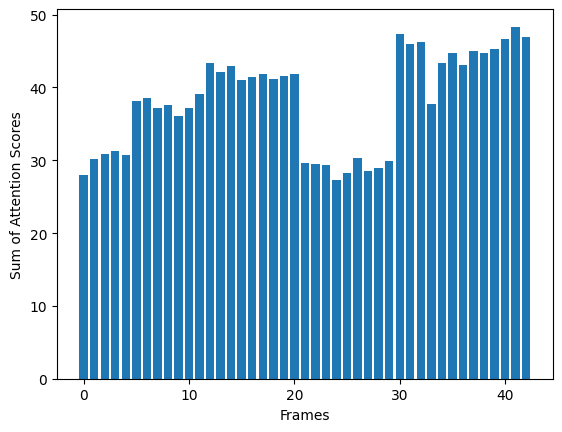

In [561]:
plt.bar([i for i in range(len(video_0_attn_sum))],video_0_attn_sum.numpy())
plt.xlabel("Frames")
plt.ylabel("Sum of Attention Scores")

In [576]:
tf.math.top_k(video_0_attn_sum, k=5)

TopKV2(values=<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([48.326897, 47.343655, 46.85683 , 46.583042, 46.20929 ],
      dtype=float32)>, indices=<tf.Tensor: shape=(5,), dtype=int32, numpy=array([41, 30, 42, 40, 32], dtype=int32)>)

In [579]:
n = 41

In [580]:
attn_weights = video_0_attn[0][n]

In [581]:
attn_weights_neg = -1 * video_0_attn[0][n]

In [582]:
vals, index = tf.math.top_k(attn_weights, k=10)

In [583]:
neg_vals, neg_index = tf.math.top_k(attn_weights_neg, k=5)

In [584]:
index = index.numpy()
vals = vals.numpy()

In [585]:
neg_index = neg_index.numpy()
neg_vals = neg_vals.numpy()

In [586]:
print(index)
print(vals)

[38 39 37 40 36 21 33 34 30 32]
[0.90353096 0.8961082  0.8746468  0.8669087  0.8656336  0.8616607
 0.8560562  0.8550445  0.8541077  0.8505863 ]


In [587]:
print(neg_index)
print(neg_vals)

[63 58 60 59 19]
[-0.5565314  -0.5614941  -0.5750317  -0.5784665  -0.58293736]


In [590]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Attention Scores')

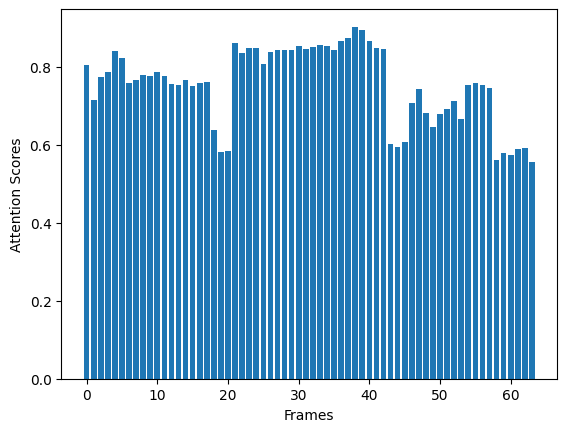

In [591]:
plt.bar([i for i in range(len(attn_weights))],attn_weights.numpy())
plt.xlabel("Frames")
plt.ylabel("Attention Scores")

In [456]:
import cv2

In [457]:
cap = cv2.VideoCapture(video_0)

In [458]:
cap.get(cv2.CAP_PROP_FPS)

25.0

In [459]:
cap1 = cv2.VideoCapture(video_1)

In [460]:
cap1.get(cv2.CAP_PROP_FPS)

30.0

In [577]:
cap.set(cv2.CAP_PROP_POS_FRAMES, 25*41)
ret, frame = cap.read()

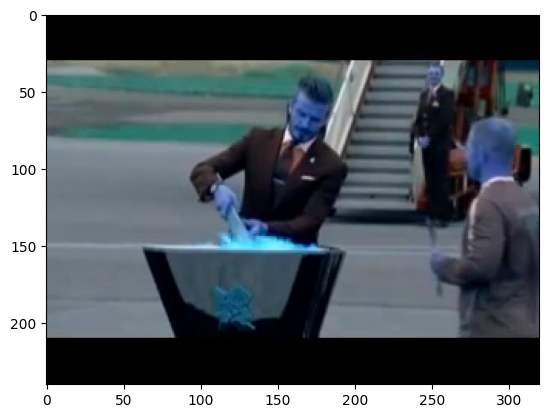

In [578]:
from matplotlib import pyplot as plt
plt.imshow(frame)
plt.show()

In [593]:
cap1.set(cv2.CAP_PROP_POS_FRAMES, 30*63)
ret, frame = cap1.read()

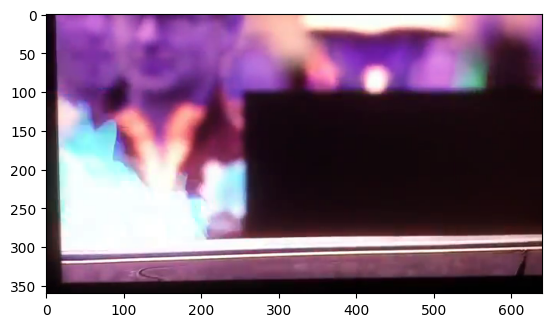

In [594]:
from matplotlib import pyplot as plt
plt.imshow(frame)
plt.show()

In [34]:
import json, os

In [35]:
fivr_path = "../../FIVR-200K/dataset/"
cs_videos = "../../FIVR-200K/dataset/FullCS.json"
ds_videos = "../../FIVR-200K/dataset/FullDS.json"
nd_videos = "../../FIVR-200K/dataset/FullND.json"

In [36]:
with open(ds_videos, "r") as file:
    videos_dict = json.load(file)

similarity_arr = []
for query_video in videos_dict:
    query_video_full_path = os.path.join(fivr_path, "FIVR", query_video+".mp4")
    video_0_frames = data_loader.read_video_frames(query_video_full_path, 1, "RESNET_50", 120)
    video_0_frames = tf.expand_dims(video_0_frames, axis=0)
    t0 = tf.RaggedTensor.from_tensor(video_0_frames)
    
    reference_videos = videos_dict[query_video]
    
    for reference_video in reference_videos:
        reference_video_full_path = os.path.join(fivr_path, "FIVR", reference_video+".mp4")
        
        video_1_frames = data_loader.read_video_frames(reference_video_full_path, 1, "RESNET_50", 120)
        video_1_frames = tf.expand_dims(video_1_frames, axis=0)
        t1 = tf.RaggedTensor.from_tensor(video_1_frames)
        
        video_0_enc, video_0_attn, video_1_enc, video_1_attn = model([t0, t1])
        
        similarity = tf.matmul(video_0_enc, tf.transpose(video_1_enc))
        similarity = similarity.numpy()
        similarity = similarity[0][0]
        print(query_video, reference_video, similarity)
        similarity_arr.append(similarity)

[h264 @ 0x1821efc0] mmco: unref short failure


aoNInMCfVYw 6s7dG18-Bxs 0.6332776
aoNInMCfVYw b7kfU4yZYec 0.4045074


[h264 @ 0x6bdb980] mmco: unref short failure
[h264 @ 0x6bdb980] mmco: unref short failure
[h264 @ 0x6bdb980] mmco: unref short failure
[h264 @ 0x6bdb980] mmco: unref short failure
[h264 @ 0x6bdb980] mmco: unref short failure
[h264 @ 0x6bdb980] mmco: unref short failure
[h264 @ 0x6bdb980] mmco: unref short failure
[h264 @ 0x6bdb980] mmco: unref short failure


yVvVI9PLoOc RxSH5ffk2E4 0.8117857


[h264 @ 0x187c3f40] mmco: unref short failure
[h264 @ 0x187c3f40] mmco: unref short failure
[h264 @ 0x187c3f40] mmco: unref short failure
[h264 @ 0x187c3f40] mmco: unref short failure
[h264 @ 0x187c3f40] mmco: unref short failure


yVvVI9PLoOc I9iIvH1xuWU 0.43946162
joOujhqBqs0 dWxpzasvnBY 0.5243548
joOujhqBqs0 UrWxc_a3SRY 0.624369
NtmNO8pgXnE 0qIBQdNR0wM 0.81895614
NtmNO8pgXnE cHvAoMH-ayw 0.560232


[h264 @ 0x170b06c0] mmco: unref short failure
[h264 @ 0x170b06c0] mmco: unref short failure
[h264 @ 0x170b06c0] mmco: unref short failure
[h264 @ 0x170b06c0] mmco: unref short failure
[h264 @ 0x170b06c0] mmco: unref short failure


resmD0PSzHs aHCxFuCrHBU 0.44437754
resmD0PSzHs U888dohC6Xk 0.3680046


[h264 @ 0x1823c0c0] mmco: unref short failure
[h264 @ 0x1823c0c0] mmco: unref short failure


-F1MReluK_Y g0dfaJAC4cY 0.6511307
-F1MReluK_Y Wwfg3DPvBM8 0.51199836


[h264 @ 0x1ba1f000] mmco: unref short failure
[h264 @ 0x1ba1f000] mmco: unref short failure
[h264 @ 0x1ba1f000] mmco: unref short failure


f5AgpPVG9vM 8I0aFQJv-5M 0.26112926


[h264 @ 0x1ba271c0] mmco: unref short failure
[h264 @ 0x1ba271c0] mmco: unref short failure
[h264 @ 0x1ba271c0] mmco: unref short failure
[h264 @ 0x1ba271c0] mmco: unref short failure
[h264 @ 0x1ba271c0] mmco: unref short failure
[h264 @ 0x1ba271c0] mmco: unref short failure
[h264 @ 0x1ba271c0] mmco: unref short failure
[h264 @ 0x1ba271c0] mmco: unref short failure
[h264 @ 0x1ba271c0] mmco: unref short failure
[h264 @ 0x1ba271c0] mmco: unref short failure
[h264 @ 0x1ba271c0] mmco: unref short failure


f5AgpPVG9vM BqLTdQQ1VA0 0.28364572
hILt-pP83AU WqdaK0upZ6g 0.30019152
hILt-pP83AU HYRVMqAFifg 0.4563637
2wMe2ZSqnec HFxE_0t5iBw 0.6901528
2wMe2ZSqnec 3OGE0A4WD2M 0.81496793
TmD3SibKHmI zNUnoUlV1LA 0.700564
TmD3SibKHmI svzB0QYNIWI 0.71906483


[h264 @ 0x1821fc00] mmco: unref short failure
[h264 @ 0x1821fc00] mmco: unref short failure


n_dfai6F5lg BScitBFqj9A 0.7106835
n_dfai6F5lg A6U9pbskk_o 0.67260426


[h264 @ 0x1ba1e4c0] mmco: unref short failure
[h264 @ 0x1ba1e4c0] mmco: unref short failure
[h264 @ 0x1ba1e4c0] mmco: unref short failure
[h264 @ 0x1ba1e4c0] mmco: unref short failure
[h264 @ 0x1ba1e4c0] mmco: unref short failure
[h264 @ 0x1ba1e4c0] mmco: unref short failure
[h264 @ 0x1ba1e4c0] mmco: unref short failure


V_QD1cKljf0 56W8bDU6w-I 0.34327188
V_QD1cKljf0 53xZFETfN8U 0.70314634
Mw_nlr5pZEI ZLitk1IOOL0 0.28636247
Mw_nlr5pZEI jcU2eVdbq08 0.28823552
D6oBg1vVQZo LiTHJV-nZRQ 0.27138463
D6oBg1vVQZo 6eLJdr9e4Hg 0.23199128
2ncF3Gfkbao DIOHNlAqEtI 0.7839738
2ncF3Gfkbao OMeD7yUidTY 0.45780435
GJij-4mt6SA ZM2nO5gqS60 0.36769056
GJij-4mt6SA JHLuJ0zsu5E 0.27888075
k_NT43aJ_Jw QUPkDU63jz8 0.91402173
k_NT43aJ_Jw 6XZrE24uJwc 0.69157636


[h264 @ 0x1ba09a80] mmco: unref short failure
[h264 @ 0x1ba09a80] mmco: unref short failure
[h264 @ 0x1ba09a80] mmco: unref short failure
[h264 @ 0x1ba09a80] mmco: unref short failure
[h264 @ 0x1ba09a80] mmco: unref short failure
[h264 @ 0x1ba09a80] mmco: unref short failure


CtEQUnLVREY j-tPcIPefVs 0.3112496


[h264 @ 0x1ba09400] mmco: unref short failure
[h264 @ 0x1ba09400] mmco: unref short failure
[h264 @ 0x1ba09400] mmco: unref short failure
[h264 @ 0x1ba09400] mmco: unref short failure


CtEQUnLVREY oSI4n6xZ86s 0.27663365
yL1ddCm55y4 lRXsOyFRvaY 0.41006184
yL1ddCm55y4 BSOqezKnVdM 0.29532424


[h264 @ 0x1ba1f000] mmco: unref short failure
[h264 @ 0x1ba1f000] mmco: unref short failure


5CVZLZZqvzI ALzbMIRJ0u4 0.84037316


[h264 @ 0x180bbfc0] mmco: unref short failure
[h264 @ 0x180bbfc0] mmco: unref short failure
[h264 @ 0x180bbfc0] mmco: unref short failure
[h264 @ 0x180bbfc0] mmco: unref short failure
[h264 @ 0x180bbfc0] mmco: unref short failure


5CVZLZZqvzI _mbqmWFinAI 0.79215884


[h264 @ 0x16f20e40] mmco: unref short failure
[h264 @ 0x16f20e40] mmco: unref short failure
[h264 @ 0x16f20e40] mmco: unref short failure
[h264 @ 0x16f20e40] mmco: unref short failure
[h264 @ 0x16f20e40] mmco: unref short failure
[h264 @ 0x16f20e40] mmco: unref short failure
[h264 @ 0x16f20e40] mmco: unref short failure
[h264 @ 0x16f20e40] mmco: unref short failure
[h264 @ 0x16f20e40] mmco: unref short failure
[h264 @ 0x16f20e40] mmco: unref short failure
[h264 @ 0x16f20e40] mmco: unref short failure


mJbhNTmE-yQ 0iAYk4t-EbU 0.35791066
mJbhNTmE-yQ YyJ4ysv5E3I 0.5072001


[h264 @ 0x1ba1e4c0] mmco: unref short failure
[h264 @ 0x1ba1e4c0] mmco: unref short failure
[h264 @ 0x1ba1e4c0] mmco: unref short failure


-VkKyuMhBTg 3whrA3b--GM 0.31857392
-VkKyuMhBTg JOigg5LzYYw 0.41559988
dQEuwGZulSM GSJBIIp-Eg0 0.795416
dQEuwGZulSM L8jaoWtI1Oc 0.8131093


KeyboardInterrupt: 

In [ ]:
len(similarity_arr)

In [45]:
len(ds_videos)

35

In [595]:
import pickle

In [724]:
similarity_arr_file = open('../../Results/Resnet_Trainable_custom_cross_attn_correct_00/ds/resnet_custom_self_attn_sim.pickle', 'rb')   
similarity_arr = pickle.load(similarity_arr_file)

In [725]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [726]:
thresholds = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]
recall_arr = []
precision_arr = []
for threshold in thresholds:
    current_predictions = [1 if pred>threshold else 0 for pred in similarity_arr]
    r = recall_score([1 for _ in range(len(current_predictions))], current_predictions)
    p = precision_score([1 for _ in range(len(current_predictions))], current_predictions)
    recall_arr.append(r)
    precision_arr.append(p)

In [727]:
import matplotlib.pyplot as plt

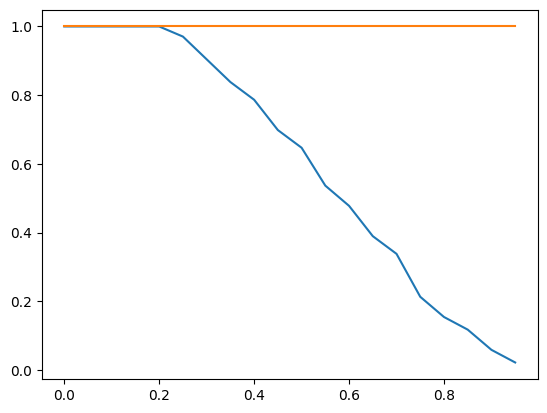

In [728]:
plt.plot(thresholds, recall_arr)
plt.plot(thresholds, precision_arr)

In [729]:
recall = [round(r, 4) for r in recall_arr]

In [730]:
thresholds[10], thresholds[11], thresholds[12], thresholds[13]

(0.5, 0.55, 0.6, 0.65)

In [731]:
recall[10], recall[11], recall[12], recall[13]

(0.6471, 0.5368, 0.4779, 0.3897)

In [723]:
recall

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9492,
 0.8814,
 0.8814,
 0.7288,
 0.6949,
 0.6271,
 0.4915,
 0.3729,
 0.322,
 0.2712,
 0.2373,
 0.1017,
 0.0169,
 0.0,
 0.0]

In [3]:
arr_nd = [0.875, 0.8942, 0.8942, 0.8846] # ND
arr_ds = [0.5515, 0.4191, 0.4191, 0.3897] # DS
arr_cs = [0.5424, 0.3898, 0.3729, 0.322] # CS

<BarContainer object of 4 artists>

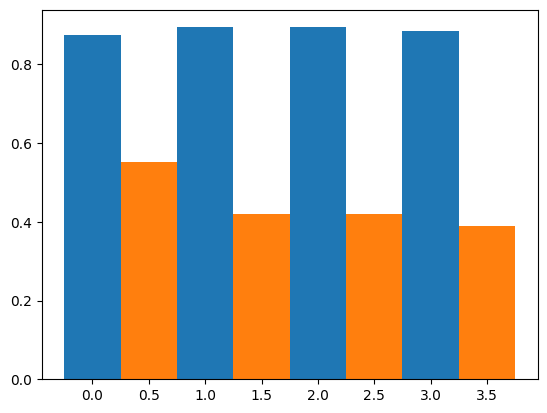

In [6]:
width1 = 0.5
r1 = np.arange(4)
plt.bar(r1, arr_nd, width=width1, label = 'ND')
plt.bar(r1 + width1, arr_ds, width=width1, label = 'DS')

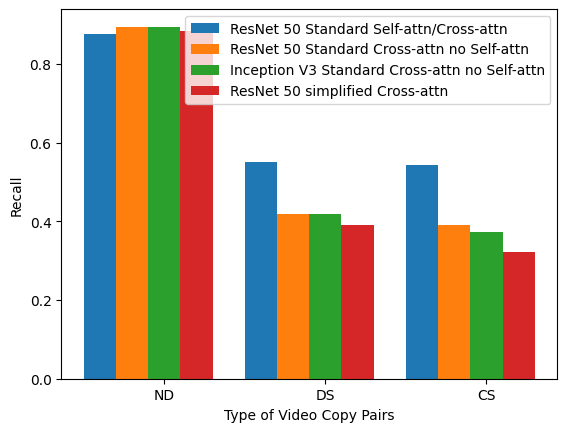

In [15]:
X = ['ND','DS','CS']
model1 = [0.8750,0.5515,0.5424]
model2 = [0.8942,0.4191,0.3898]
model3 = [0.8942,0.4191,0.3729]
model4 = [0.8846,0.3897,0.322]


X_axis = np.arange(len(X))

plt.bar(X_axis - 0.4, model1, 0.2, label = 'ResNet 50 Standard Self-attn/Cross-attn')
plt.bar(X_axis - 0.2, model2, 0.2, label = 'ResNet 50 Standard Cross-attn no Self-attn')
plt.bar(X_axis + 0.0, model3, 0.2, label = 'Inception V3 Standard Cross-attn no Self-attn')
plt.bar(X_axis + 0.2, model4, 0.2, label = 'ResNet 50 simplified Cross-attn')

plt.xticks(X_axis, X)
plt.xlabel("Type of Video Copy Pairs")
plt.ylabel("Recall")
# plt.title("Number of Students in each group")
plt.legend()
plt.show()

In [16]:
import pickle

In [66]:
t1_file = open('../../Results/Resnet_50_trainable/nd/resnet_trainable_time.pickle', 'rb')   
t1 = pickle.load(t1_file)

In [67]:
t2_file = open('../../Results/Resnet_50_trainable/ds/resnet_trainable_time.pickle', 'rb')   
t2 = pickle.load(t2_file)

In [68]:
t3_file = open('../../Results/Resnet_50_trainable/cs/resnet_trainable_time.pickle', 'rb')   
t3 = pickle.load(t3_file)

In [69]:
t = t1 + t2 + t3

In [70]:
len(t)

299

In [71]:
sum(t) / len(t)

0.35729637592532565

In [54]:
0.357 * 300

107.1

In [55]:
0.487 * 300

146.1

In [63]:
t[0] = 1

In [64]:
t

[1,
 0.09521365165710449,
 0.21603679656982422,
 0.11698365211486816,
 0.15071606636047363,
 0.12971091270446777,
 0.246856689453125,
 0.24644160270690918,
 0.14651250839233398,
 0.12046623229980469,
 0.0936424732208252,
 0.1552259922027588,
 0.14642620086669922,
 0.14385724067687988,
 0.2174849510192871,
 0.1714320182800293,
 0.17647981643676758,
 0.1257643699645996,
 0.14116263389587402,
 0.13911890983581543,
 0.13800621032714844,
 0.14495420455932617,
 0.1251075267791748,
 0.12644505500793457,
 0.07953596115112305,
 0.08038449287414551,
 0.09542298316955566,
 0.08968091011047363,
 0.17466211318969727,
 0.1863410472869873,
 0.3418087959289551,
 0.13810348510742188,
 0.12843561172485352,
 0.08260536193847656,
 0.25531482696533203,
 0.180894136428833,
 0.19789505004882812,
 0.2639338970184326,
 0.17653965950012207,
 0.19090485572814941,
 0.14760398864746094,
 0.17371869087219238,
 0.2102820873260498,
 0.13510513305664062,
 0.13791751861572266,
 0.18244075775146484,
 0.07634687423706055

In [5]:
import tensorflow as tf

2023-09-04 13:59:09.515063: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-09-04 13:59:09.552111: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-04 13:59:09.758487: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-04 13:59:09.760235: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-04 13:59:11.064806: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [13]:
model = tf.keras.models.load_model("../../Results/Resnet_Trainable_custom_cross_attn_correct_00/Resnet_Trainable_custom_cross_attn_correct_00")

In [14]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, None, 224, 224, 3)   0         []                            
                             ]                                                                    
                                                                                                  
 input_3 (InputLayer)        [(None, None, 224, 224, 3)   0         []                            
                             ]                                                                    
                                                                                                  
 cnn_video_encoder (CNNVide  (None, None, 2048)           2358771   ['input_2[0][0]',             
 oEncoder)                                                2          'input_3[0][0]']       